# Lesson 6.04 Boosting

## What is Boosting?
Boosting is a Supervised Machine Learning ensemble algorithm for reducing bias and variance as well as to turn weak learners into strong learners.

## How is Boosting different from Bagging?

- **Bagging:** Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data
- **Boosting:** Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.


## Boosting Techniques

### 1. AdaBoost

1. An additive model where shortcomings of previous models are identified by high-weight data points.
2. The trees are usually grown as decision stumps.
3. Each classifier has different weights assigned to the final prediction based on its performance.
4. It gives weights to both classifiers and observations thus capturing maximum variance within data.

### 2. Gradient Boosting

1. An additive model where shortcomings of previous models are identified by the gradient.
2. The trees are grown to a greater depth usually ranging from 8 to 32 terminal nodes.
3. All classifiers are weighed equally and their predictive capacity is restricted with learning rate to increase accuracy.
4. It builds trees on previous classifier’s residuals thus capturing variance in data.

## Import Libraries

In [1]:
#pip install xgboost # to install xgboost

# A simple toy dataset to visualize clustering and classification algorithms
from sklearn.datasets import make_moons

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, HistGradientBoostingClassifier

from xgboost import XGBClassifier

## Load Data

In [2]:
# Noise refers to degree of introducing correlated, redundant and uninformative features to the data 
X, y = make_moons(n_samples=10000, noise=.5, random_state=0)

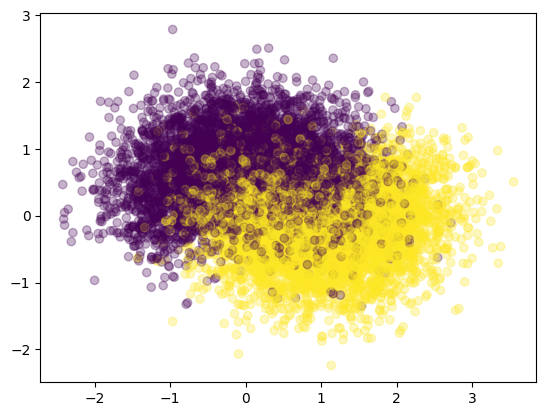

In [3]:
plt.scatter(X[:, 0], X[:, 1],  c=y, cmap='viridis', alpha=0.3)

## Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Store all model accuracy for comparison
score_dict = {}

## Fit a Decision Tree model as comparison

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
score_dict["Decision Tree"] = acc
print(acc)

0.7535


## Fit a Random Forest model

In [7]:
# n_estimators refer to the number of trees in the forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
score_dict["Random Forest"] = acc
print(acc)

0.7975


## Fit a AdaBoost model

In [8]:
# n_estimators refer to the maximum number of estimators at which boosting is terminated. 
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
score_dict["AdaBoost"] = acc
print(acc)

/opt/anaconda3/envs/ga/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.833


## Fit a Gradient Boosting model

In [9]:
# n_estimators refer to the number of boosting stages to perform
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
score_dict["sklearn GB Tree"] = acc
print(acc)


0.8335


## Fit a Histogram Gradient Boosting model (akin to LightGBM/XGBoost)

In [10]:
clf = HistGradientBoostingClassifier(max_iter=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
score_dict["sklearn HistGB Tree"] = acc
print(acc)

0.8235


## Fit a XGBoost model

In [11]:
clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
score_dict["XGB Tree"] = acc
print(acc)

0.8345


[Text(0, 0, '75.35'),
 Text(0, 0, '79.75'),
 Text(0, 0, '83.3'),
 Text(0, 0, '83.35'),
 Text(0, 0, '82.35'),
 Text(0, 0, '83.45')]

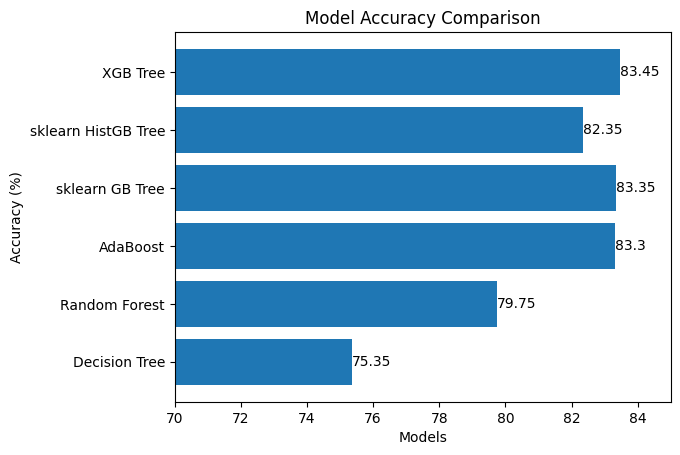

In [12]:
score_dict = {k:v * 100 for k, v in score_dict.items()}

bars = plt.barh(list(score_dict.keys()), list(score_dict.values()))
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xlim(70, 85)
plt.bar_label(bars)